In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, SCORERS
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import tree

<h1 align='center'>Посмотрим частоту увольнения по датам.</h1>

In [2]:
data = pd.read_csv('ОБЩИЕ ДАННЫЕ (2).csv', sep=';', encoding = "ansi")

In [42]:
termination = data[['id', 'termination', 'gender']].drop_duplicates()[lambda x: x != '00.00.0000']
termination = termination.dropna()

In [44]:
termination.termination = pd.to_datetime(termination.termination, format='%d.%m.%Y')

In [45]:
sns.set(rc={'figure.figsize':(14,10)})

<AxesSubplot:xlabel='termination', ylabel='Count'>

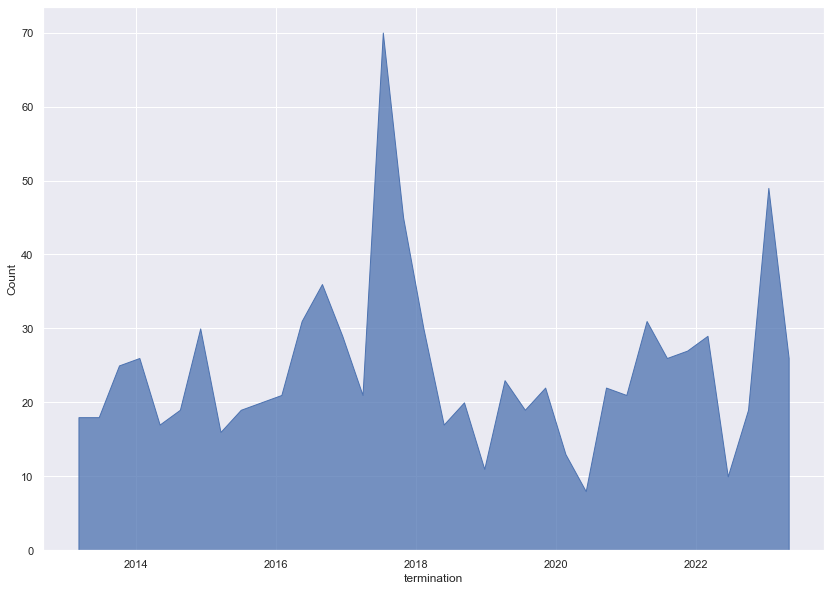

In [59]:
sns.histplot(data = termination.termination, bins=36, element="poly")

<h1 align='center'>Разделим на мужчин и женщин.</h1>

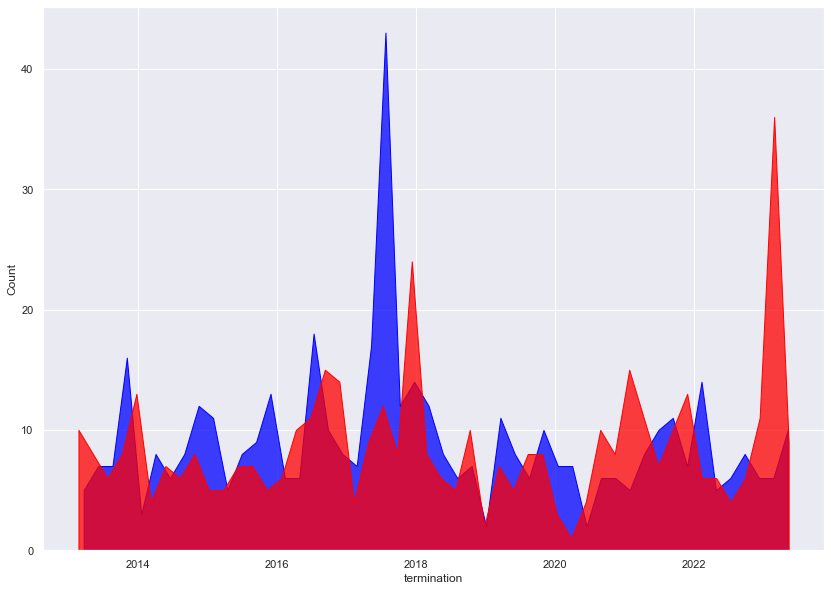

In [80]:
fig, ax = plt.subplots()
for a in [0,1]:
    x = [termination[termination.gender == 'мужской'].termination, termination[termination.gender == 'женский'].termination]
    color = ['blue', 'red'] # - синий - мужчины, красный - женщины.
    sns.histplot(x[a], bins=50, ax=ax,
                 element="poly", fill=True, common_norm=True, color=color[a])
    